In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import ROOT
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   

px = 1/plt.rcParams['figure.dpi']

def b2helix(n):
    return sns.cubehelix_palette(n, start=1.5, rot=1.5, dark=0.3, light=.8, reverse=True)

def watermark(t=None,logo="Belle II", px=0.033, py=0.915, fontsize=16, alpha=0.8, alpha_logo=0.95, shift=0.15, bstyle='italic', *args, **kwargs):
       
    """

    Args:
        t:
        logo:
        px:
        py:
        fontsize:
        alpha:
        shift:
        *args:
        **kwargs:

    Returns:

    """
    if t is None:
        import datetime
        t = " %d (group)" % datetime.date.today().year

    plt.text(px, py, logo, ha='left',
             transform=plt.gca().transAxes,
             fontsize=fontsize,
             style=bstyle,
             alpha=alpha_logo,
             weight='bold',
             *args, **kwargs,
             # fontproperties=font,
             # bbox={'facecolor':'#377eb7', 'alpha':0.1, 'pad':10}
             )
    plt.text(px + shift, py, t, ha='left',
             transform=plt.gca().transAxes,
             fontsize=fontsize,
             #          style='italic',
             alpha=alpha,  *args, **kwargs
             #          fontproperties=font,
             # bbox={'facecolor':'#377eb7', 'alpha':0.1, 'pad':10}
             )    

Welcome to JupyROOT 6.26/04


In [22]:
import pandas as pd
import numpy as np
from hist.get_data import get_data, get_data_in_np


In [3]:
file_name_Dtokshortpi0 = '/media/jykim/ssd_T5/storage/01_recon/kshort/pre_signalMC_recon_mdst_Dtokshortpi0.root'

In [4]:
# base_filter = 'kshort_rank_Dstp==1'
base_filter = 'Pis_charge==1'

In [5]:
signal_variables = ['D0_M','kshort_M','Dstarp_Q','Dstarp_CMS_p','Pi0_Prob']

In [6]:
pd_Dtokshortpi0 = get_data(file=file_name_Dtokshortpi0, tree='kshort', base_filter=base_filter,variables=signal_variables )


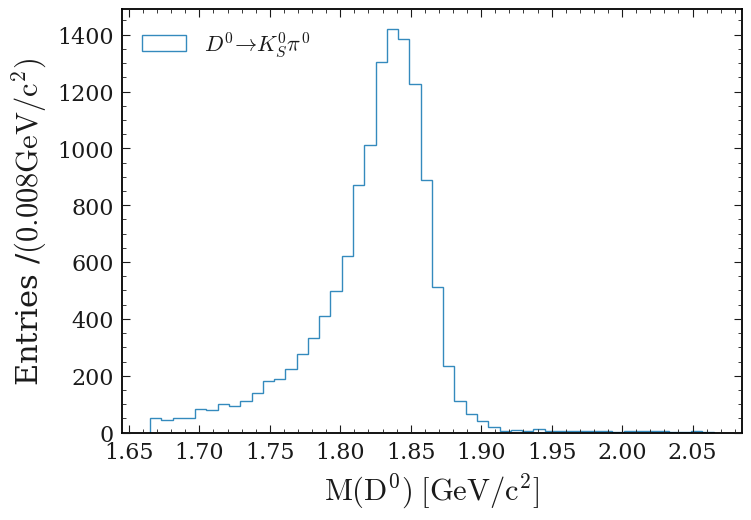

In [7]:
fig = plt.figure()
ax = fig.subplots()

xrange = (1.665,2.065,51)
xm = np.linspace(*xrange)


df = pd_Dtokshortpi0.query("Pi0_Prob < 0.9 and Dstarp_CMS_p>2.4 and abs(Dstarp_Q - 0.00593) < 0.0006 and abs(kshort_M - 0.49761)<0.009")
plt.hist(df["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to K^0_S \pi^0$');


plt.legend(loc="upper left")
# ax.set_title(r'$D^0 \to K^0_S \gamma$ in ' )

n, xe = np.histogram(df["D0_M"], bins=50, range=(1.665,2.065))

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');


In [8]:
def DRAW(pd_df,cut):
#     fig = plt.figure()
#     ax = fig.subplots()

    xrange = (1.665,2.065,51)
    xm = np.linspace(*xrange)


    df = pd_df.query(cut)
    plt.hist(df["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to K^0_S \gamma$');


    plt.legend(loc="upper right")
    ax=plt.gca()
    ax.set_title(r'$D^0 \to K^0_S \pi^0$ (after)' )

    n, xe = np.histogram(df["D0_M"], bins=50, range=(1.665,2.065))

    ax.set_xlim(1.665,2.065)
#     ax.set_ylim(0,4000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    
    print(f"# of entries = {len(df)}")

In [9]:
def DRAW_kshort(pd_df,cut):
#     fig = plt.figure()
#     ax = fig.subplots()

    xrange = (0.480,0.514,51)
    xm = np.linspace(*xrange)


    df = pd_df.query(cut)
    plt.hist(df["kshort_M"],bins=xm,histtype='step',label=r'$D^0 \to K^0_S \gamma$');


    plt.legend(loc="upper right")
    ax=plt.gca()
    ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(df["kshort_M"], bins=50, range=(0.480,0.514))

    ax.set_xlim(0.480,0.514)
#     ax.set_ylim(0,4000)
    plt.axvline(x=[0.49761-0.009], ymin=0, ymax=0.80, color='r', ls='--', lw=2)
    plt.axvline(x=[0.49761+0.009], ymin=0, ymax=0.80, color='r', ls='--', lw=2)
    plt.xlabel("$\mathrm{M(K^0_S)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.4f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

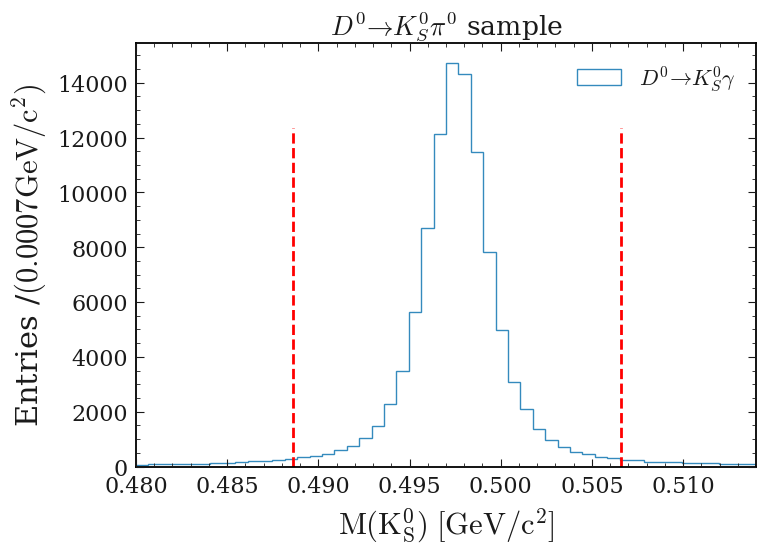

In [10]:
DRAW_kshort(pd_Dtokshortpi0, cut='D0_M<2.5')

In [11]:
cut ='D0_M<2.5'

# of entries = 107972


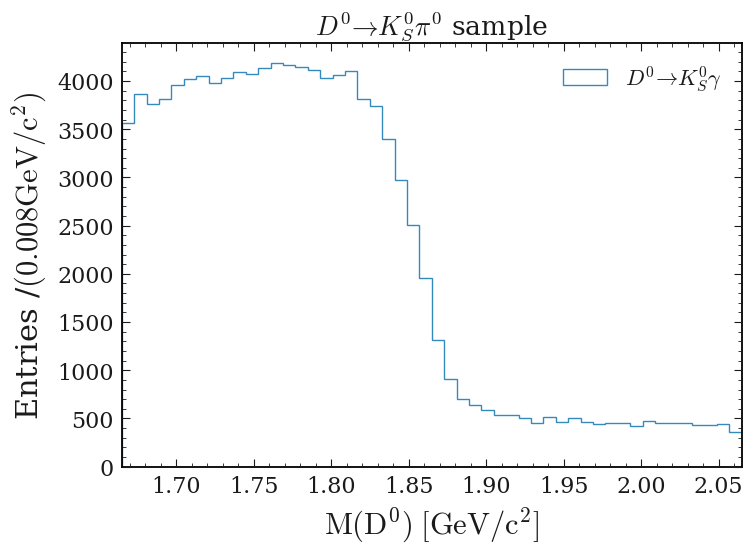

In [12]:
DRAW(pd_Dtokshortpi0, cut)

In [13]:
cut = "abs(kshort_M - 0.49761)<0.009"

# of entries = 100561


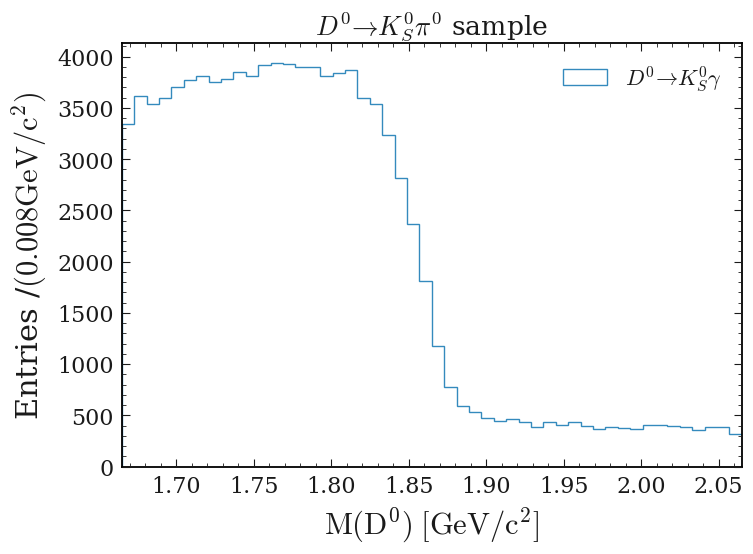

In [14]:
DRAW(pd_Dtokshortpi0, cut)

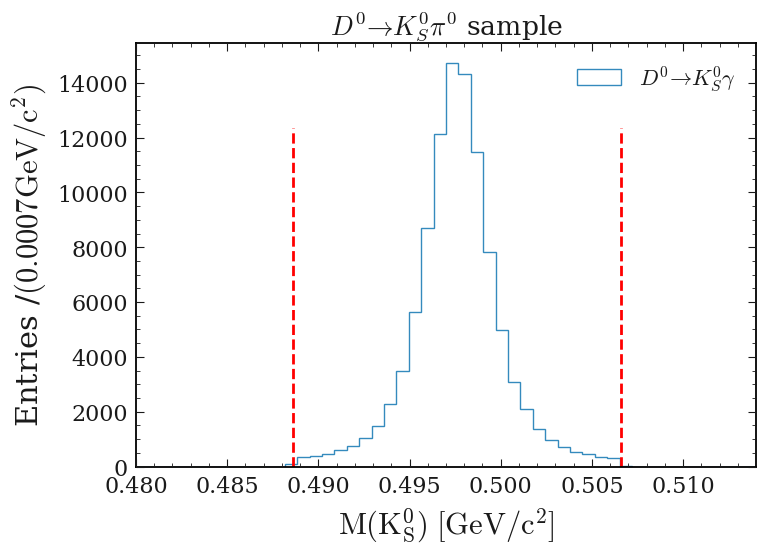

In [15]:
DRAW_kshort(pd_Dtokshortpi0, cut)

In [16]:
cut = "Dstarp_CMS_p>2.4 and abs(kshort_M - 0.49761)<0.009"

# of entries = 87642


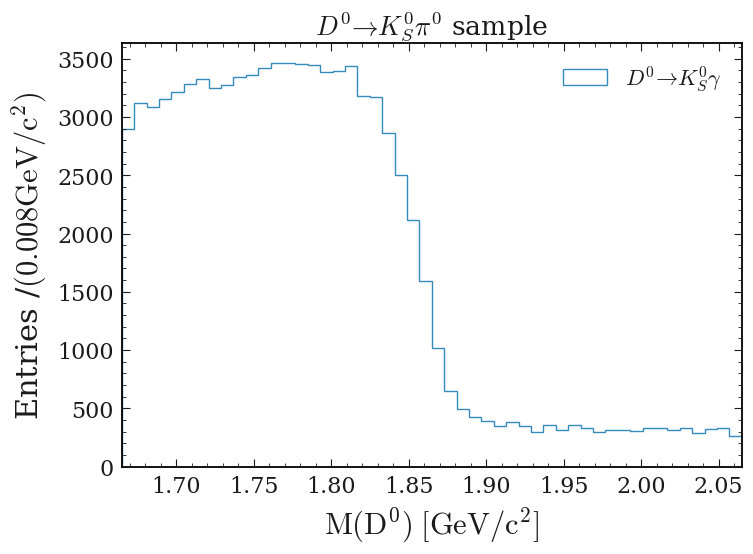

In [17]:
DRAW(pd_Dtokshortpi0, cut)

In [95]:
cut = "Dstarp_CMS_p>2.4 and abs(Dstarp_Q - 0.00593) < 0.0006 and abs(kshort_M - 0.49761)<0.009"

# of entries = 26912


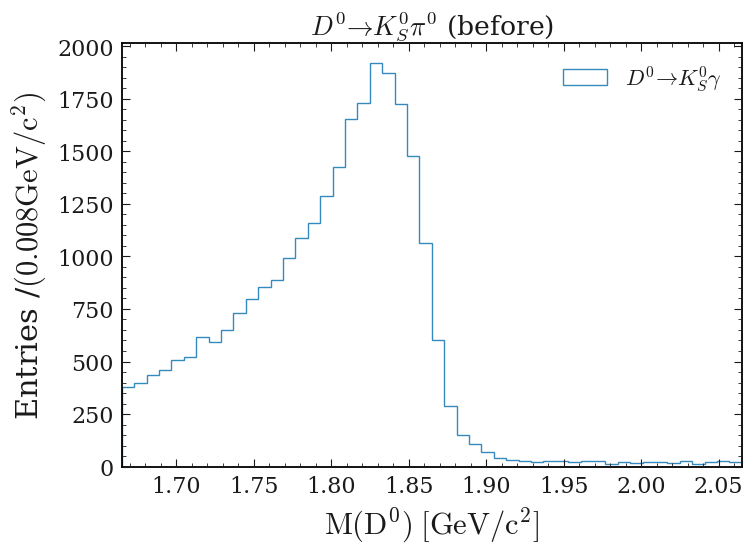

In [96]:
DRAW(pd_Dtokshortpi0, cut)

In [98]:
cut = "Pi0_Prob < 0.9 and Dstarp_CMS_p>2.4 and abs(Dstarp_Q - 0.00593) < 0.0006 and abs(kshort_M - 0.49761)<0.009"

# of entries = 12733


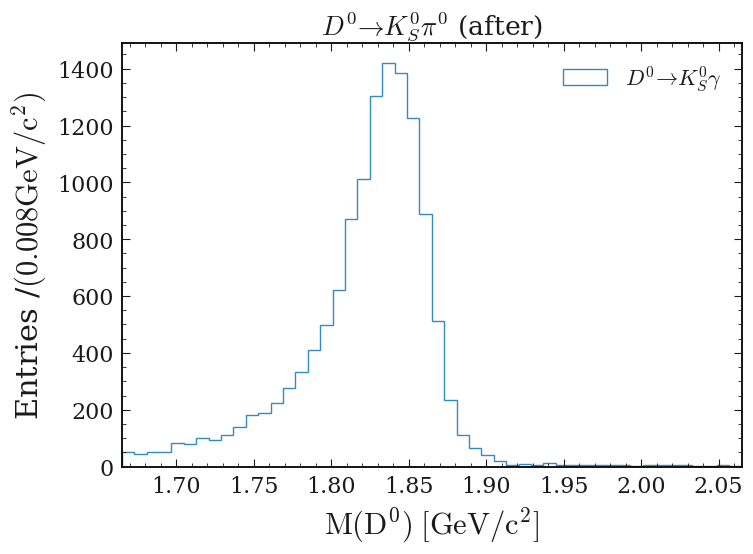

In [99]:
DRAW(pd_Dtokshortpi0, cut)

# of entries = 12733


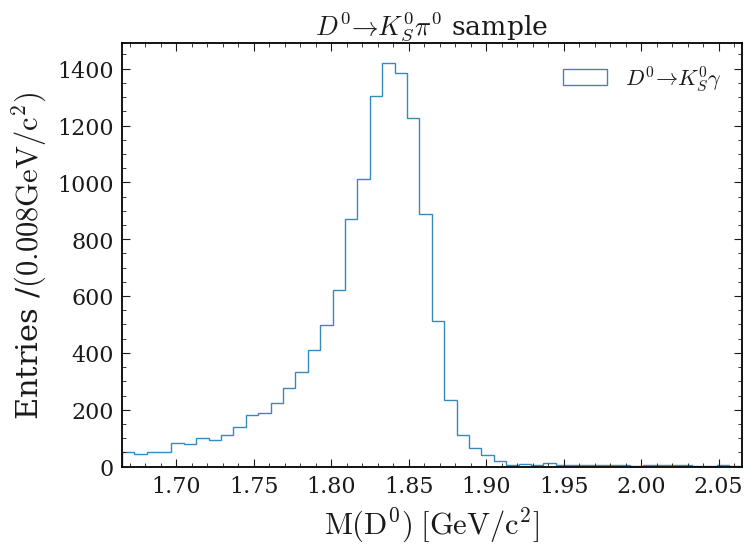

In [22]:
DRAW(pd_Dtokshortpi0, cut)

In [10]:
base_filter = 'kshort_rank_Dstp==1'
# base_filter = 'Pis_charge==1'

In [11]:
signal_variables = ['D0_M','kshort_M','Dstarp_Q','Dstarp_CMS_p','Pi0_Prob']

In [12]:
ccbar_name_Dtokshortpi0 = '/media/jykim/ssd_T5/storage/grid/merged_ntuples/ccbar/check_pi0veto_ccbar_recon_output_0*.root'

uubar_name_Dtokshortpi0 = ccbar_name_Dtokshortpi0.replace("ccbar", "uubar")

ddbar_name_Dtokshortpi0 = ccbar_name_Dtokshortpi0.replace("ccbar", "ddbar")

ssbar_name_Dtokshortpi0 = ccbar_name_Dtokshortpi0.replace("ccbar", "ssbar")

charged_name_Dtokshortpi0 = ccbar_name_Dtokshortpi0.replace("ccbar", "charged")

mixed_name_Dtokshortpi0 = ccbar_name_Dtokshortpi0.replace("ccbar", "mixed")

taupair_name_Dtokshortpi0 = ccbar_name_Dtokshortpi0.replace("ccbar", "taupair")

In [13]:
ddbar_name_Dtokshortpi0

'/media/jykim/ssd_T5/storage/grid/merged_ntuples/ddbar/check_pi0veto_ddbar_recon_output_0*.root'

In [14]:
base_ccbar_1abinv_Dtokshortpi0 = get_data(file=ccbar_name_Dtokshortpi0, tree='kshort', base_filter=base_filter,variables=signal_variables )

base_uubar_1abinv_Dtokshortpi0 = get_data(file=uubar_name_Dtokshortpi0, tree='kshort', base_filter=base_filter,variables=signal_variables )

base_ddbar_1abinv_Dtokshortpi0 = get_data(file=ddbar_name_Dtokshortpi0, tree='kshort', base_filter=base_filter,variables=signal_variables )

base_ssbar_1abinv_Dtokshortpi0 = get_data(file=ssbar_name_Dtokshortpi0, tree='kshort', base_filter=base_filter,variables=signal_variables )

base_charged_1abinv_Dtokshortpi0 = get_data(file=charged_name_Dtokshortpi0, tree='kshort', base_filter=base_filter,variables=signal_variables )

base_mixed_1abinv_Dtokshortpi0 = get_data(file=mixed_name_Dtokshortpi0, tree='kshort', base_filter=base_filter,variables=signal_variables )

base_taupair_1abinv_Dtokshortpi0 = get_data(file=taupair_name_Dtokshortpi0, tree='kshort', base_filter=base_filter,variables=signal_variables )



In [15]:
# cut = "Pi0_Prob < 0.9 and Dstarp_CMS_p>2.4 and abs(Dstarp_Q - 0.00593) < 0.0006 and abs(kshort_M - 0.49761)<0.009"
cut = " Dstarp_CMS_p>2.4 and abs(Dstarp_Q - 0.00593) < 0.0006 and abs(kshort_M - 0.49761)<0.009"

# cut = "kshort_M>0"

In [16]:
ccbar_1abinv_Dtokshortpi0 = base_ccbar_1abinv_Dtokshortpi0.query(cut)
uubar_1abinv_Dtokshortpi0 = base_uubar_1abinv_Dtokshortpi0.query(cut)
ddbar_1abinv_Dtokshortpi0 = base_ddbar_1abinv_Dtokshortpi0.query(cut)
ssbar_1abinv_Dtokshortpi0 = base_ssbar_1abinv_Dtokshortpi0.query(cut)
charged_1abinv_Dtokshortpi0 = base_charged_1abinv_Dtokshortpi0.query(cut)
mixed_1abinv_Dtokshortpi0 = base_mixed_1abinv_Dtokshortpi0.query(cut)
taupair_1abinv_Dtokshortpi0 = base_taupair_1abinv_Dtokshortpi0.query(cut)

In [17]:
pd = ddbar_1abinv_Dtokshortpi0
cut = "kshort_M>0"
# cut = "Pi0_Prob < 0.9 and Dstarp_CMS_p>2.4 and abs(Dstarp_Q - 0.00593) < 0.0006 and abs(kshort_M - 0.49761)<0.009"

In [87]:
# fig = plt.figure()
# ax = fig.subplots()

# xrange = (1.665,2.065,51)
# xm = np.linspace(*xrange)


# df = pd.query(cut)
# plt.hist(df["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to K^0_S \pi^0$');


# plt.legend(loc="upper left")
# # ax.set_title(r'$D^0 \to K^0_S \gamma$ in ' )

# n, xe = np.histogram(df["D0_M"], bins=50, range=(1.665,2.065))

# plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
# width = xe[1]-xe[0]
# plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

In [88]:
xrange = (1.665,2.065,51)
xm = np.linspace(*xrange)

In [89]:
counts, bins = np.histogram(ccbar_1abinv_Dtokshortpi0['D0_M'],50)

In [90]:
bins[:-1]

array([1.66500708, 1.67300639, 1.6810057 , 1.68900501, 1.69700432,
       1.70500363, 1.71300294, 1.72100225, 1.72900156, 1.73700087,
       1.74500018, 1.75299949, 1.7609988 , 1.76899811, 1.77699742,
       1.78499673, 1.79299604, 1.80099535, 1.80899466, 1.81699397,
       1.82499328, 1.83299259, 1.8409919 , 1.84899121, 1.85699052,
       1.86498983, 1.87298915, 1.88098846, 1.88898777, 1.89698708,
       1.90498639, 1.9129857 , 1.92098501, 1.92898432, 1.93698363,
       1.94498294, 1.95298225, 1.96098156, 1.96898087, 1.97698018,
       1.98497949, 1.9929788 , 2.00097811, 2.00897742, 2.01697673,
       2.02497604, 2.03297535, 2.04097466, 2.04897397, 2.05697328])

(array([1946., 2070., 2150., 2210., 2315., 2496., 2474., 2549., 2659.,
        2785., 2852., 2989., 3059., 3189., 3302., 3540., 3896., 4139.,
        4596., 5054., 5393., 5256., 4893., 4150., 2978., 1839., 1146.,
         699.,  561.,  424.,  423.,  399.,  419.,  451.,  407.,  396.,
         379.,  406.,  358.,  395.,  367.,  421.,  354.,  349.,  351.,
         344.,  353.,  386.,  347.,  320.]),
 array([1.66500708, 1.67300639, 1.6810057 , 1.68900501, 1.69700432,
        1.70500363, 1.71300294, 1.72100225, 1.72900156, 1.73700087,
        1.74500018, 1.75299949, 1.7609988 , 1.76899811, 1.77699742,
        1.78499673, 1.79299604, 1.80099535, 1.80899466, 1.81699397,
        1.82499328, 1.83299259, 1.8409919 , 1.84899121, 1.85699052,
        1.86498983, 1.87298915, 1.88098846, 1.88898777, 1.89698708,
        1.90498639, 1.9129857 , 1.92098501, 1.92898432, 1.93698363,
        1.94498294, 1.95298225, 1.96098156, 1.96898087, 1.97698018,
        1.98497949, 1.9929788 , 2.00097811, 2.00897742, 

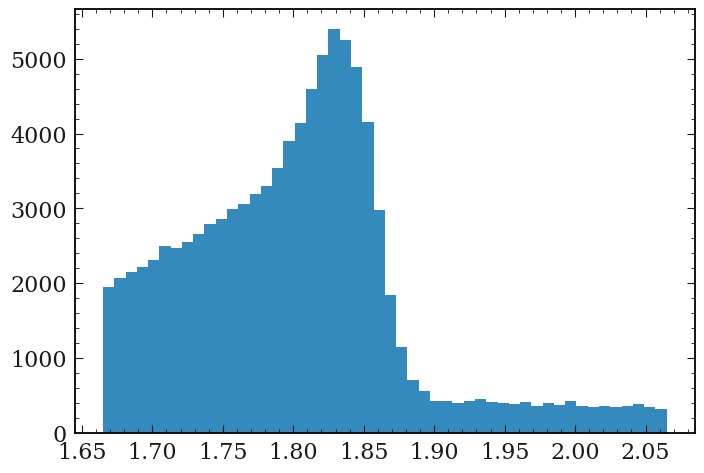

In [91]:
plt.hist(bins[:-1], bins, weights=counts)


In [92]:
np.ones_like(ccbar_1abinv_Dtokshortpi0['D0_M'])

array([1., 1., 1., ..., 1., 1., 1.])

D0_M


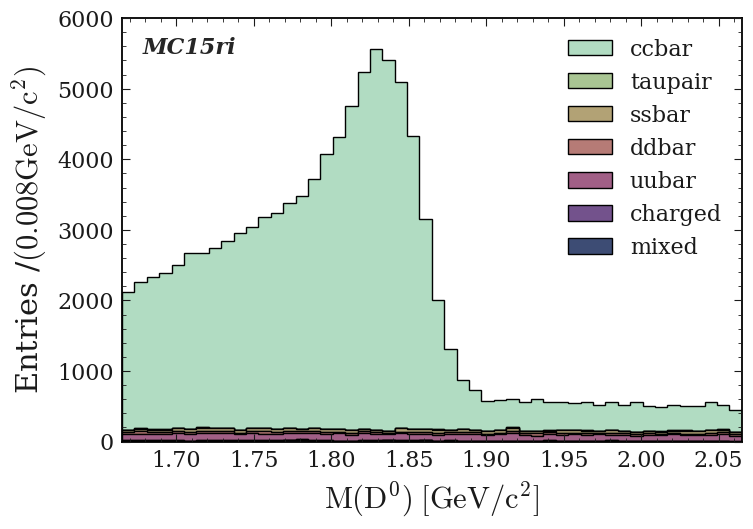

mixed = 439
charged = 357
uubar = 4498
ddbar = 1321
ccbar = 95234
ssbar = 1761
taupair = 182
TOTAL # = 103792


<Figure size 800x550 with 0 Axes>

In [93]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar' ]


colors=b2helix(7)

data_list=dict()
signal_variables = ["D0_M"]

for var in signal_variables:
    labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : mixed_1abinv_Dtokshortpi0[var] }
    charged_bkg = {var : charged_1abinv_Dtokshortpi0[var] }
    ccbar_bkg = {var : ccbar_1abinv_Dtokshortpi0[var] }
    uubar_bkg = {var : uubar_1abinv_Dtokshortpi0[var] }
    ddbar_bkg = {var : ddbar_1abinv_Dtokshortpi0[var] }
    ssbar_bkg = {var : ssbar_1abinv_Dtokshortpi0[var] }
    taupair_bkg = {var : taupair_1abinv_Dtokshortpi0[var] }
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    plt.hist(data_list[var], bins=50, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
        
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()
    cut = "Dstarp_CMS_p>2.4 and abs(Dstarp_Q - 0.00593) < 0.0006 and abs(kshort_M - 0.49761)<0.009"
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(df["D0_M"], bins=50, range=(1.665,2.065))

    ax.set_xlim(1.665,2.065)
    ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()
print(f"mixed = {len(mixed_bkg[var])}")
print(f"charged = {len(charged_bkg[var])}")
print(f"uubar = {len(uubar_bkg[var])}")
print(f"ddbar = {len(ddbar_bkg[var])}")
print(f"ccbar = {len(ccbar_bkg[var])}")
print(f"ssbar = {len(ssbar_bkg[var])}")
print(f"taupair = {len(taupair_bkg[var])}")

print(f"TOTAL # = {len(mixed_bkg[var]) + len(charged_bkg[var]) + len(uubar_bkg[var]) + len(ddbar_bkg[var]) + len(ssbar_bkg[var]) + len(ccbar_bkg[var]) + len(taupair_bkg[var])}")


D0_M


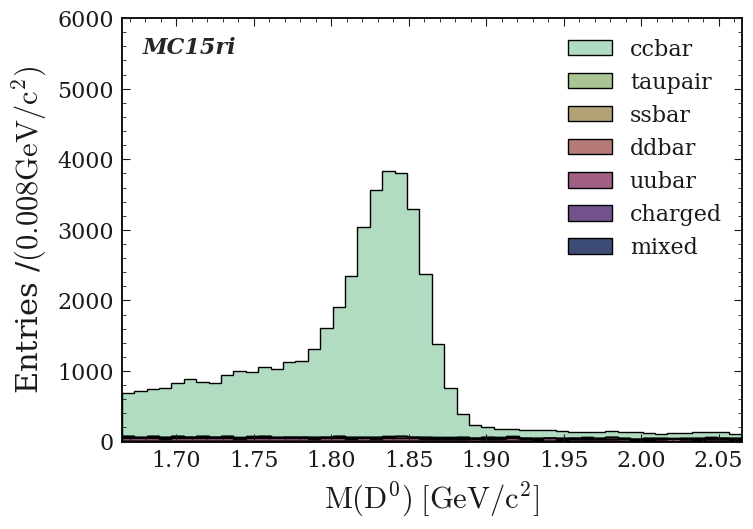

mixed = 187
charged = 128
uubar = 1757
ddbar = 476
ccbar = 43293
ssbar = 524
taupair = 92
TOTAL # = 46457


<Figure size 800x550 with 0 Axes>

In [83]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar' ]


colors=b2helix(7)

data_list=dict()

signal_variables = ["D0_M"]

for var in signal_variables:
    labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : mixed_1abinv_Dtokshortpi0[var] }
    charged_bkg = {var : charged_1abinv_Dtokshortpi0[var] }
    ccbar_bkg = {var : ccbar_1abinv_Dtokshortpi0[var] }
    uubar_bkg = {var : uubar_1abinv_Dtokshortpi0[var] }
    ddbar_bkg = {var : ddbar_1abinv_Dtokshortpi0[var] }
    ssbar_bkg = {var : ssbar_1abinv_Dtokshortpi0[var] }
    taupair_bkg = {var : taupair_1abinv_Dtokshortpi0[var] }
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    plt.hist(data_list[var], bins=xm, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')

    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()
    cut = "Pi0_Prob<0.9 and Dstarp_CMS_p>2.4 and abs(Dstarp_Q - 0.00593) < 0.0006 and abs(kshort_M - 0.49761)<0.009"

#     DRAW(pd_Dtokshortpi0, cut)
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'')

    n, xe = np.histogram(df["D0_M"], bins=50, range=(1.665,2.065))

    ax.set_xlim(1.665,2.065)
    ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');    
    plt.show()
    plt.clf()
    
    
print(f"mixed = {len(mixed_bkg[var])}")
print(f"charged = {len(charged_bkg[var])}")
print(f"uubar = {len(uubar_bkg[var])}")
print(f"ddbar = {len(ddbar_bkg[var])}")
print(f"ccbar = {len(ccbar_bkg[var])}")
print(f"ssbar = {len(ssbar_bkg[var])}")
print(f"taupair = {len(taupair_bkg[var])}")

print(f"TOTAL # = {len(mixed_bkg[var]) + len(charged_bkg[var]) + len(uubar_bkg[var]) + len(ddbar_bkg[var]) + len(ssbar_bkg[var]) + len(ccbar_bkg[var]) + len(taupair_bkg[var])}")


D0_M


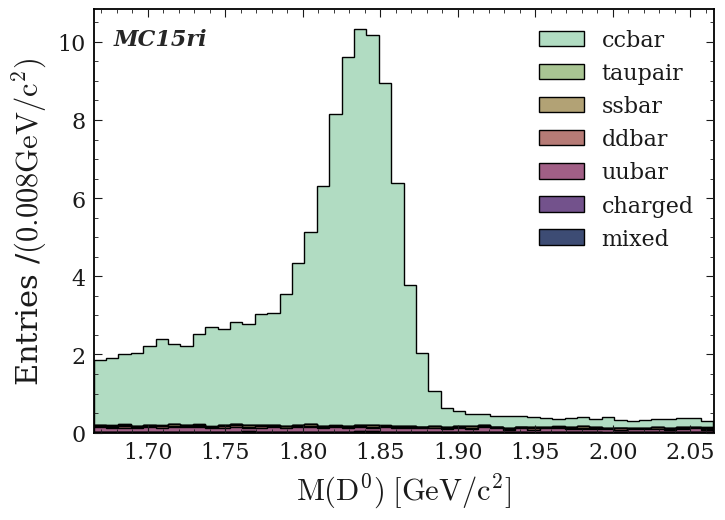

mixed = 187
charged = 128
uubar = 1757
ddbar = 476
ccbar = 43293
ssbar = 524
taupair = 92
TOTAL # = 46457


<Figure size 800x550 with 0 Axes>

In [18]:
file = '/media/jykim/ssd_T5/storage/grid/kshort_proc13_chunk5_v1_4S_jykim/kshort_proc13_chunk5_v1_4s_1876.root'

# file = '/media/jykim/ssd_T5/storage/grid/kshort_proc13_chunk2_v1_4S_jykim/kshort_proc13_chunk2_v1_4S_1839.root'
signal_variables = ['D0_M','kshort_M','Dstarp_Q','Dstarp_CMS_p','Pi0_Prob']
base_filter = 'kshort_rank_Dstp==1'
pd_Dtokshortpi0_1 = get_data(file=file, tree='kshort', base_filter=base_filter,variables=signal_variables )

In [19]:
# file = '/media/jykim/ssd_T5/storage/grid/kshort_proc13_chunk5_v1_4S_jykim/kshort_proc13_chunk5_v1_4s_1876.root'

file = '/media/jykim/ssd_T5/storage/grid/kshort_proc13_chunk2_v1_4S_jykim/kshort_proc13_chunk2_v1_4S_1839.root'
signal_variables = ['D0_M','kshort_M','Dstarp_Q','Dstarp_CMS_p','Pi0_Prob']
base_filter = 'kshort_rank_Dstp==1'
pd_Dtokshortpi0_2 = get_data(file=file, tree='kshort', base_filter=base_filter,variables=signal_variables )

In [20]:
pd_Dtokshortpi0_1

,D0_M,kshort_M,Dstarp_Q,Dstarp_CMS_p,Pi0_Prob
0,1.839625,0.542292,0.010200,2.189977,0.985156
1,1.745724,0.495487,0.006725,2.449878,0.992661
2,2.050464,0.514593,0.014335,2.889415,0.921063
3,1.823143,0.538248,0.018804,2.246125,0.826189
4,2.009564,0.498240,0.002468,2.863590,0.826989
...,...,...,...,...,...
276646,1.771136,0.476360,0.006958,2.746036,0.988976
276647,1.766374,0.474219,0.016402,2.348363,0.474849
276648,1.988292,0.476728,0.010726,2.170390,0.973977
276649,1.706123,0.531934,0.003634,2.934418,0.692955


In [23]:
# pd_Dtokshortpi0 = pd.concat([pd_Dtokshortpi0_1, pd_Dtokshortpi0_2])

pd_Dtokshortpi0 = pd.concat([ pd_Dtokshortpi0_1, pd_Dtokshortpi0_2], ignore_index=True)

# of entries = 13274


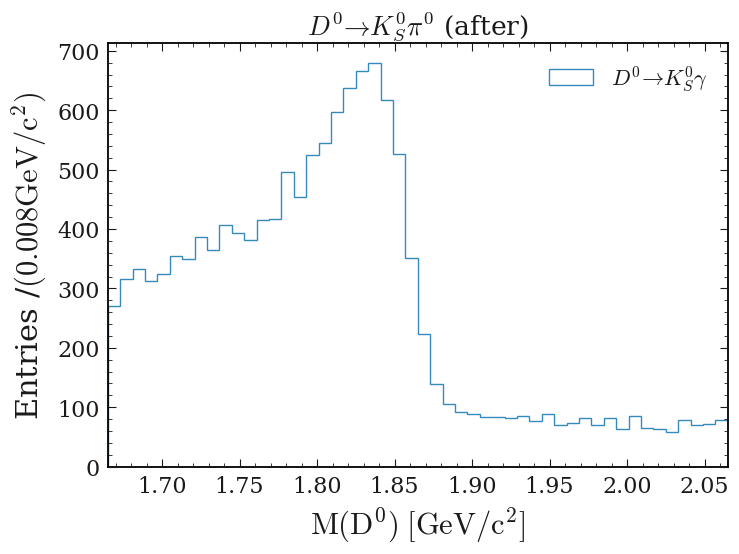

In [24]:
cut = "Dstarp_CMS_p>2.4 and abs(Dstarp_Q - 0.00593) < 0.0006 and abs(kshort_M - 0.49761)<0.009"

DRAW(pd_Dtokshortpi0, cut)

# of entries = 6193


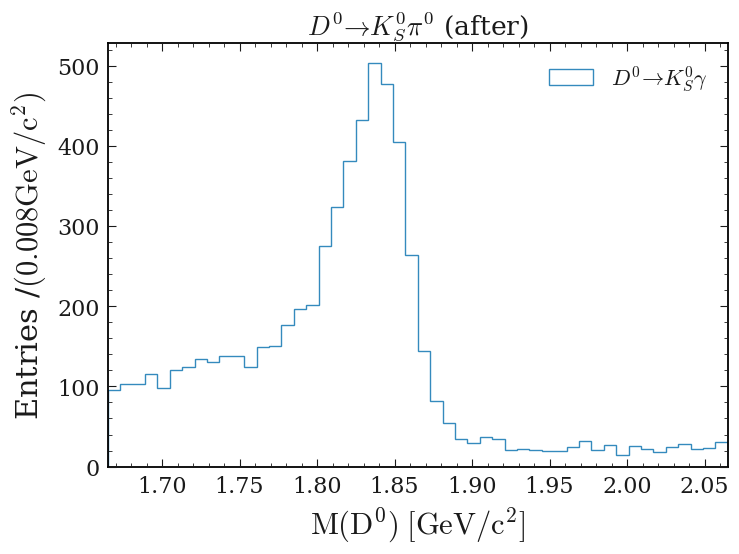

In [25]:
cut = "Pi0_Prob < 0.9 and Dstarp_CMS_p>2.4 and abs(Dstarp_Q - 0.00593) < 0.0006 and abs(kshort_M - 0.49761)<0.009"

DRAW(pd_Dtokshortpi0, cut)

### BCS

In [335]:
#MC

In [373]:
46457/103792

0.44759711731154617

In [374]:
# data

In [375]:
6193/13274

0.46655115262919994

In [376]:
(46457/103792)/ (6193/13274)

0.9593741539146559

In [223]:
# pis_charge

In [224]:
#MC

In [225]:
49036/112901

0.43432741959770066

In [228]:
# data

In [233]:
4002/8739

0.45794713353930655

In [234]:
(49036/112901) / (4002/8739)

0.9484226186567482